# Quantum-Enhanced Precision Agriculture Demo

This notebook demonstrates the complete workflow from quantum synthetic data generation to BigQuery AI integration.

## Overview
- Generate quantum-simulated sensor data using Qiskit
- Ingest data to BigQuery (or local CSV fallback)
- Create embeddings and vector index
- Perform semantic search across farm data
- Generate AI-powered agricultural insights
- Forecast crop yield using AI.FORECAST


In [1]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path

# Add src directory to path
sys.path.append(str(Path.cwd().parent / "src"))

from quantum_simulator import generate_quantum_synthetic_data
from bigquery_ai_integration import ingest_synthetic_to_bq, create_embeddings_and_index, vector_search

print("Libraries imported successfully")


Libraries imported successfully


## Step 1: Generate Quantum Synthetic Data

We use Qiskit to simulate quantum sensors that measure soil chemistry, plant stress, and weather conditions with atomic-level precision.


In [2]:
# Generate quantum synthetic data for different agricultural scenarios
scenarios = ['soil_chemistry', 'plant_stress', 'extreme_weather']
all_data = []

for scenario in scenarios:
    print(f"Generating {scenario} data...")
    df = generate_quantum_synthetic_data(
        scenario=scenario,
        num_samples=100,
        field_ids=3
    )
    all_data.append(df)
    print(f"   Generated {len(df)} samples")

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)
print(f"\n Total samples generated: {len(combined_df)}")
print(f" Columns: {list(combined_df.columns)}")


Generating soil_chemistry data...


   Generated 100 samples
Generating plant_stress data...
   Generated 100 samples
Generating extreme_weather data...
   Generated 100 samples

 Total samples generated: 300
 Columns: ['timestamp', 'field_id', 'soil_ph', 'nitrogen', 'phosphorus', 'potassium', 'moisture', 'temperature', 'scenario', 'q_value']


 Sample quantum synthetic data:


,timestamp,field_id,soil_ph,nitrogen,phosphorus,potassium,moisture,temperature,scenario,q_value
0,2025-09-21 12:45:00+00:00,field_1,6.505,11.231,5.049,8.683,24.809,20.103,soil_chemistry,0.508929
1,2025-09-21 13:00:00+00:00,field_2,6.479,8.989,6.261,9.882,29.193,16.741,soil_chemistry,0.464286
2,2025-09-21 13:15:00+00:00,field_3,6.475,9.727,5.952,7.353,34.670,19.528,soil_chemistry,0.457589
3,2025-09-21 13:30:00+00:00,field_1,6.497,11.926,4.641,8.389,22.428,21.781,soil_chemistry,0.495536
4,2025-09-21 13:45:00+00:00,field_2,6.527,12.059,4.927,11.033,31.779,19.818,soil_chemistry,0.544643
5,2025-09-21 14:00:00+00:00,field_3,6.483,12.642,6.204,9.669,31.750,21.398,soil_chemistry,0.470982
6,2025-09-21 14:15:00+00:00,field_1,6.492,12.450,4.452,11.715,27.454,20.124,soil_chemistry,0.486607
7,2025-09-21 14:30:00+00:00,field_2,6.483,10.963,6.638,8.674,35.404,20.693,soil_chemistry,0.470982
8,2025-09-21 14:45:00+00:00,field_3,6.483,8.628,5.328,8.933,29.420,19.517,soil_chemistry,0.470982
9,2025-09-21 15:00:00+00:00,field_1,6.528,9.415,3.839,8.077,37.689,17.087,soil_chemistry,0.546875



 Data distribution:
Soil pH range: 6.43 - 6.54
Nitrogen range: 5.69 - 14.31
Moisture range: 22.41 - 45.11
Quantum values: 0.386 - 0.574


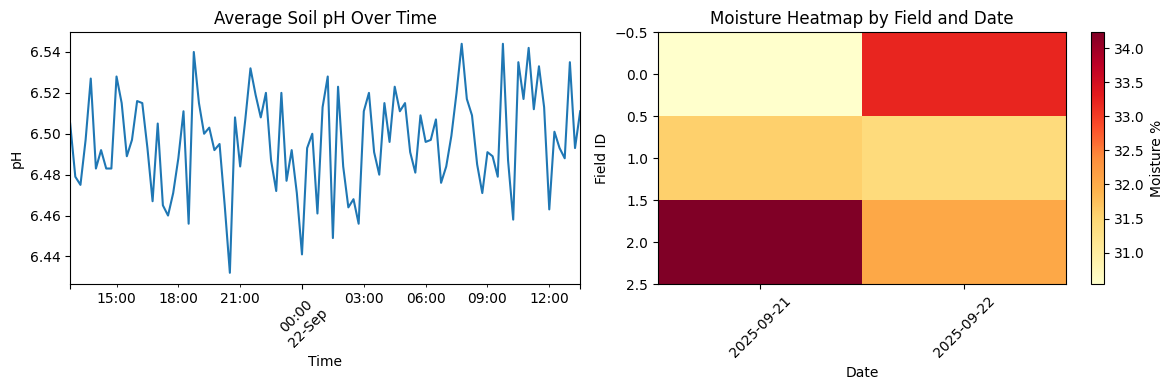


  Visualizations created showing:
  • Soil pH trends over time
  • Moisture distribution across fields and dates


In [3]:
# Display sample data
print(" Sample quantum synthetic data:")
# Ensure timestamp is datetime for plotting
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], utc=True, errors='coerce')
display(combined_df.head(10))

# Show data distribution
print("\n Data distribution:")
print(f"Soil pH range: {combined_df['soil_ph'].min():.2f} - {combined_df['soil_ph'].max():.2f}")
print(f"Nitrogen range: {combined_df['nitrogen'].min():.2f} - {combined_df['nitrogen'].max():.2f}")
print(f"Moisture range: {combined_df['moisture'].min():.2f} - {combined_df['moisture'].max():.2f}")
print(f"Quantum values: {combined_df['q_value'].min():.3f} - {combined_df['q_value'].max():.3f}")

# Create visualizations
import matplotlib.pyplot as plt

# Time series plot of average soil pH
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
combined_df.groupby('timestamp')['soil_ph'].mean().plot()
plt.title("Average Soil pH Over Time")
plt.ylabel("pH")
plt.xlabel("Time")
plt.xticks(rotation=45)

# Heatmap of field_id vs moisture
plt.subplot(1, 2, 2)
pivot_data = combined_df.pivot_table(values='moisture', index='field_id', columns=combined_df['timestamp'].dt.date, aggfunc='mean')
plt.imshow(pivot_data.values, cmap='YlOrRd', aspect='auto')
plt.colorbar(label='Moisture %')
plt.title("Moisture Heatmap by Field and Date")
plt.xlabel("Date")
plt.ylabel("Field ID")
plt.xticks(range(len(pivot_data.columns)), [str(d) for d in pivot_data.columns], rotation=45)

plt.tight_layout()
plt.show()

print("\n  Visualizations created showing:")
print("  • Soil pH trends over time")
print("  • Moisture distribution across fields and dates")
